In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
%load_ext lab_black
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
BLACK = False

if BLACK:
    plt.style.use("dark_background")
else:
    matplotlib.style.use("fivethirtyeight")
    matplotlib.style.use("seaborn-talk")
    matplotlib.pyplot.rcParams["savefig.facecolor"] = "white"
    sns.set_style("whitegrid")

matplotlib.rcParams["font.family"] = "monospace"
matplotlib.rcParams["figure.dpi"] = 120
sns.set_context("poster")

In [4]:
df = pd.concat(
    [
        pd.read_parquet("cpa_predictions.parquet"),
        pd.read_parquet("scgen_predictions.parquet"),
    ]
)
# df = pd.concat(
#     [
#         pd.read_parquet("cpa_predictions_high_dose.parquet"),
#         pd.read_parquet("scgen_predictions_high_dose.parquet"),
#     ]
# )

In [5]:
df

,index,R2,model,genes,cell_type,condition,dose,model_ct
0,A549_Alvespimycin_0.1,0.729878,baseline,degs,A549,Alvespimycin,0.1,baseline_A549
1,A549_Belinostat_0.1,0.621798,baseline,degs,A549,Belinostat,0.1,baseline_A549
2,A549_Dacinostat_0.1,0.213912,baseline,degs,A549,Dacinostat,0.1,baseline_A549
3,A549_Flavopiridol_0.1,0.839678,baseline,degs,A549,Flavopiridol,0.1,baseline_A549
4,A549_Givinostat_0.1,0.785217,baseline,degs,A549,Givinostat,0.1,baseline_A549
...,...,...,...,...,...,...,...,...
49,MCF7_Quisinostat,0.232411,scGen,degs,MCF7,Quisinostat,0.1,scGen_MCF7
50,MCF7_TAK-901,0.905027,scGen,degs,MCF7,TAK-901,0.1,scGen_MCF7
51,MCF7_Belinostat,0.908346,scGen,degs,MCF7,Belinostat,0.1,scGen_MCF7
52,MCF7_Flavopiridol,0.000000,scGen,degs,MCF7,Flavopiridol,0.1,scGen_MCF7


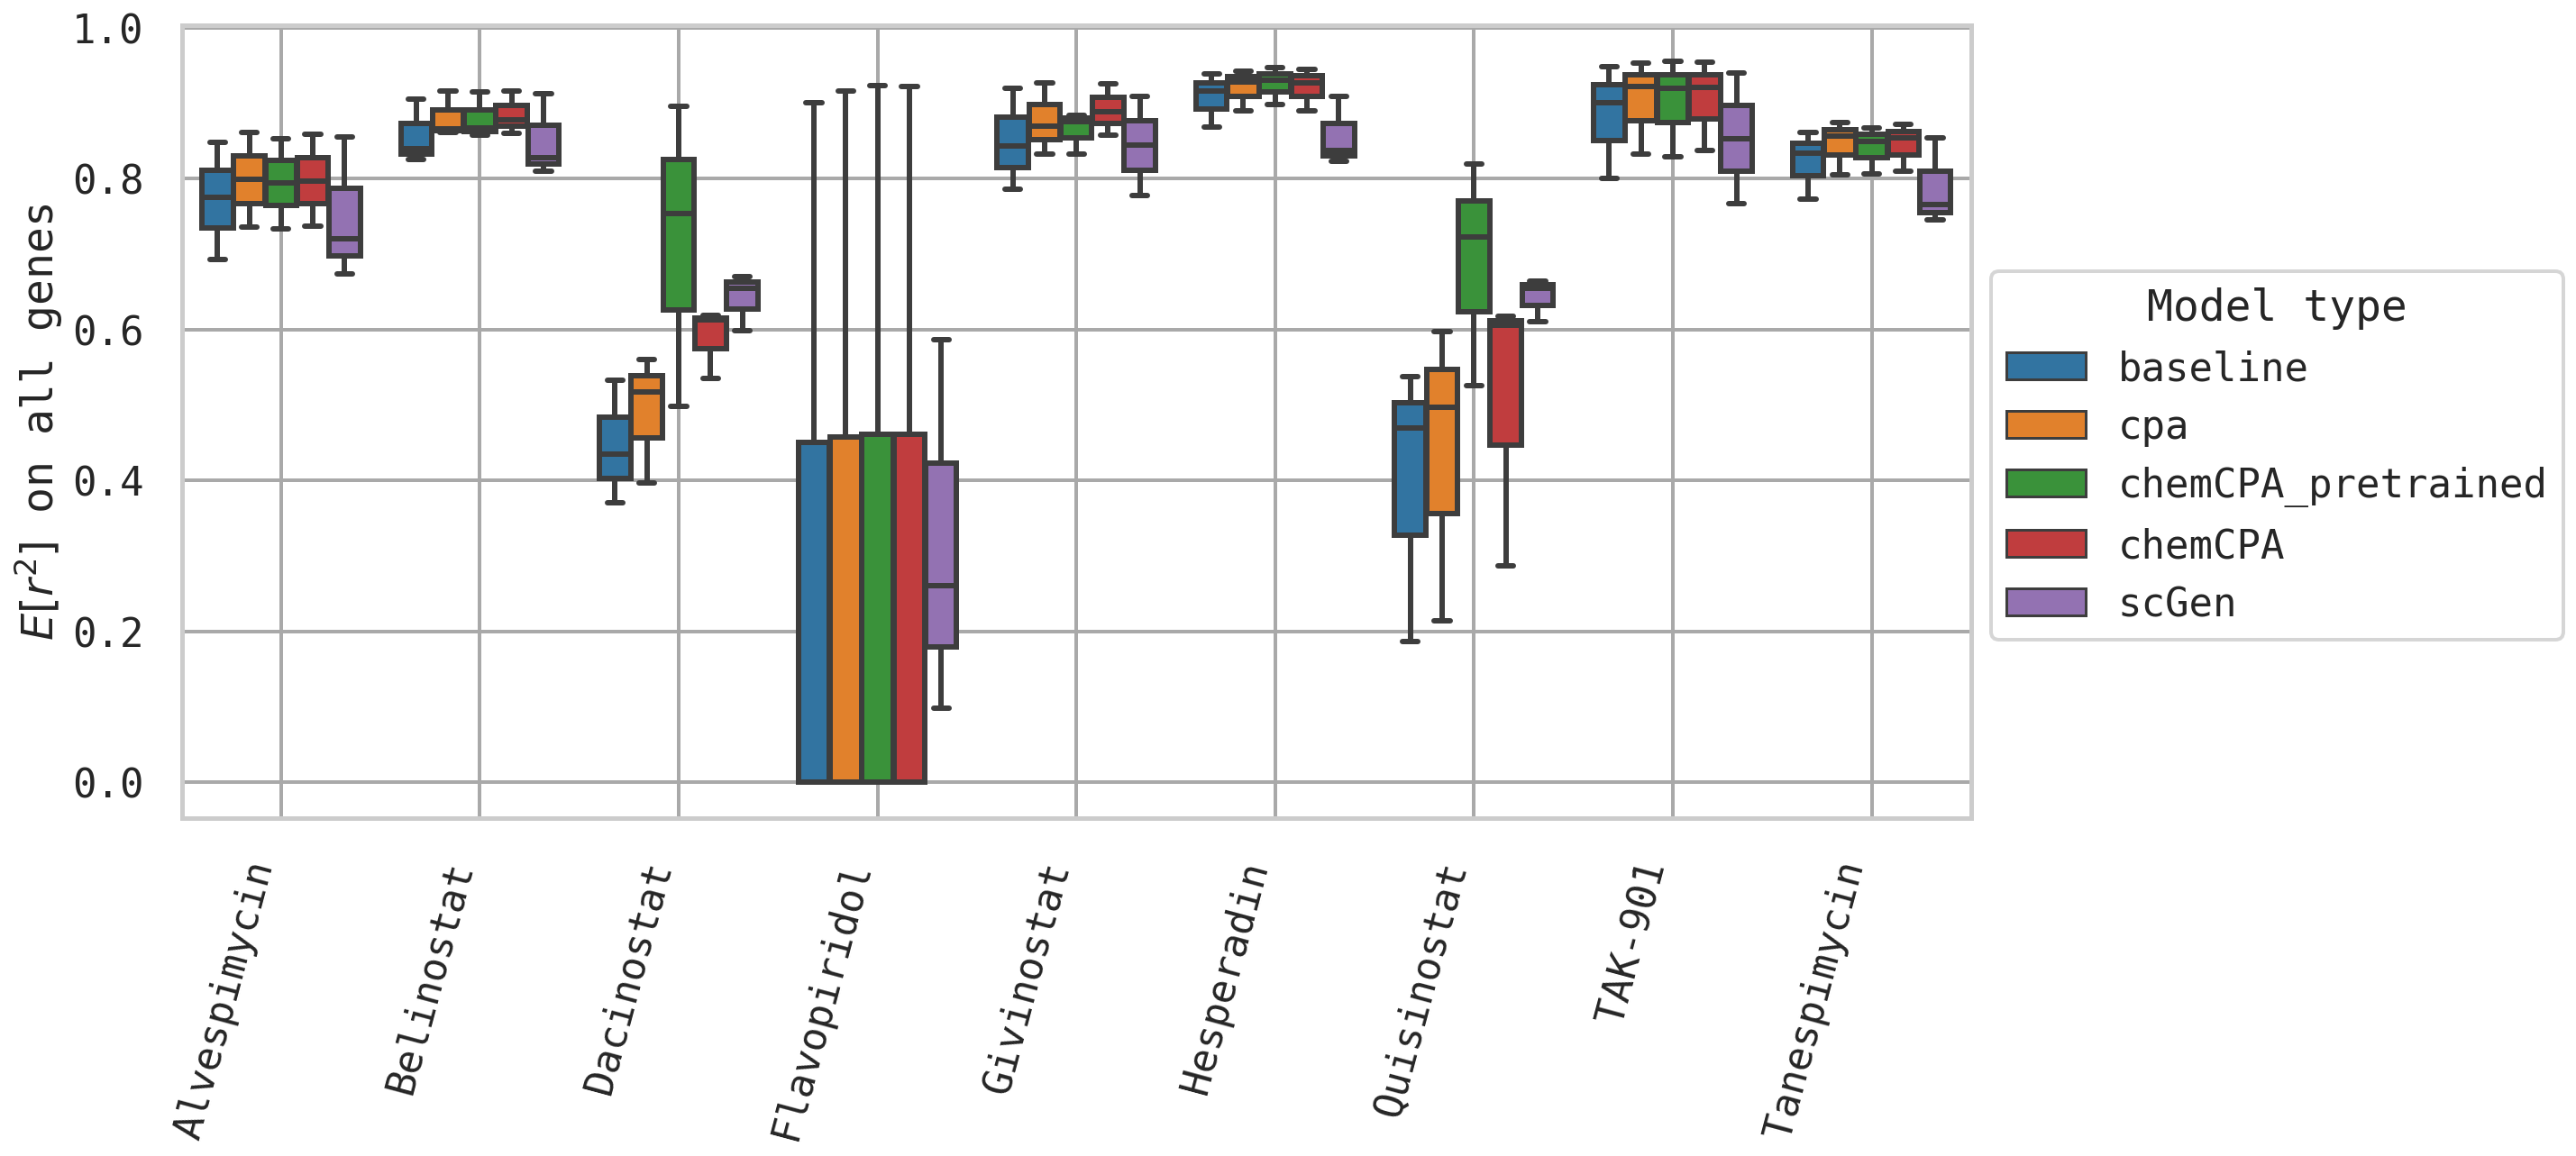

In [6]:
fig, ax = plt.subplots(figsize=(20, 9))

sns.boxplot(
    data=df[df["genes"] == "all"],
    x="condition",
    y="R2",
    hue="model",
    palette="tab10",
)
ax.set_xticklabels(ax.get_xticklabels(), rotation=75, ha="right")
ax.set_xlabel("")
ax.set_ylabel("$E[r^2]$ on all genes")
ax.legend(
    title="Model type",
    #     fontsize=18,
    #     title_fontsize=24,
    loc="lower left",
    bbox_to_anchor=(1, 0.2),
)
ax.grid(".", color="darkgrey")
plt.tight_layout()

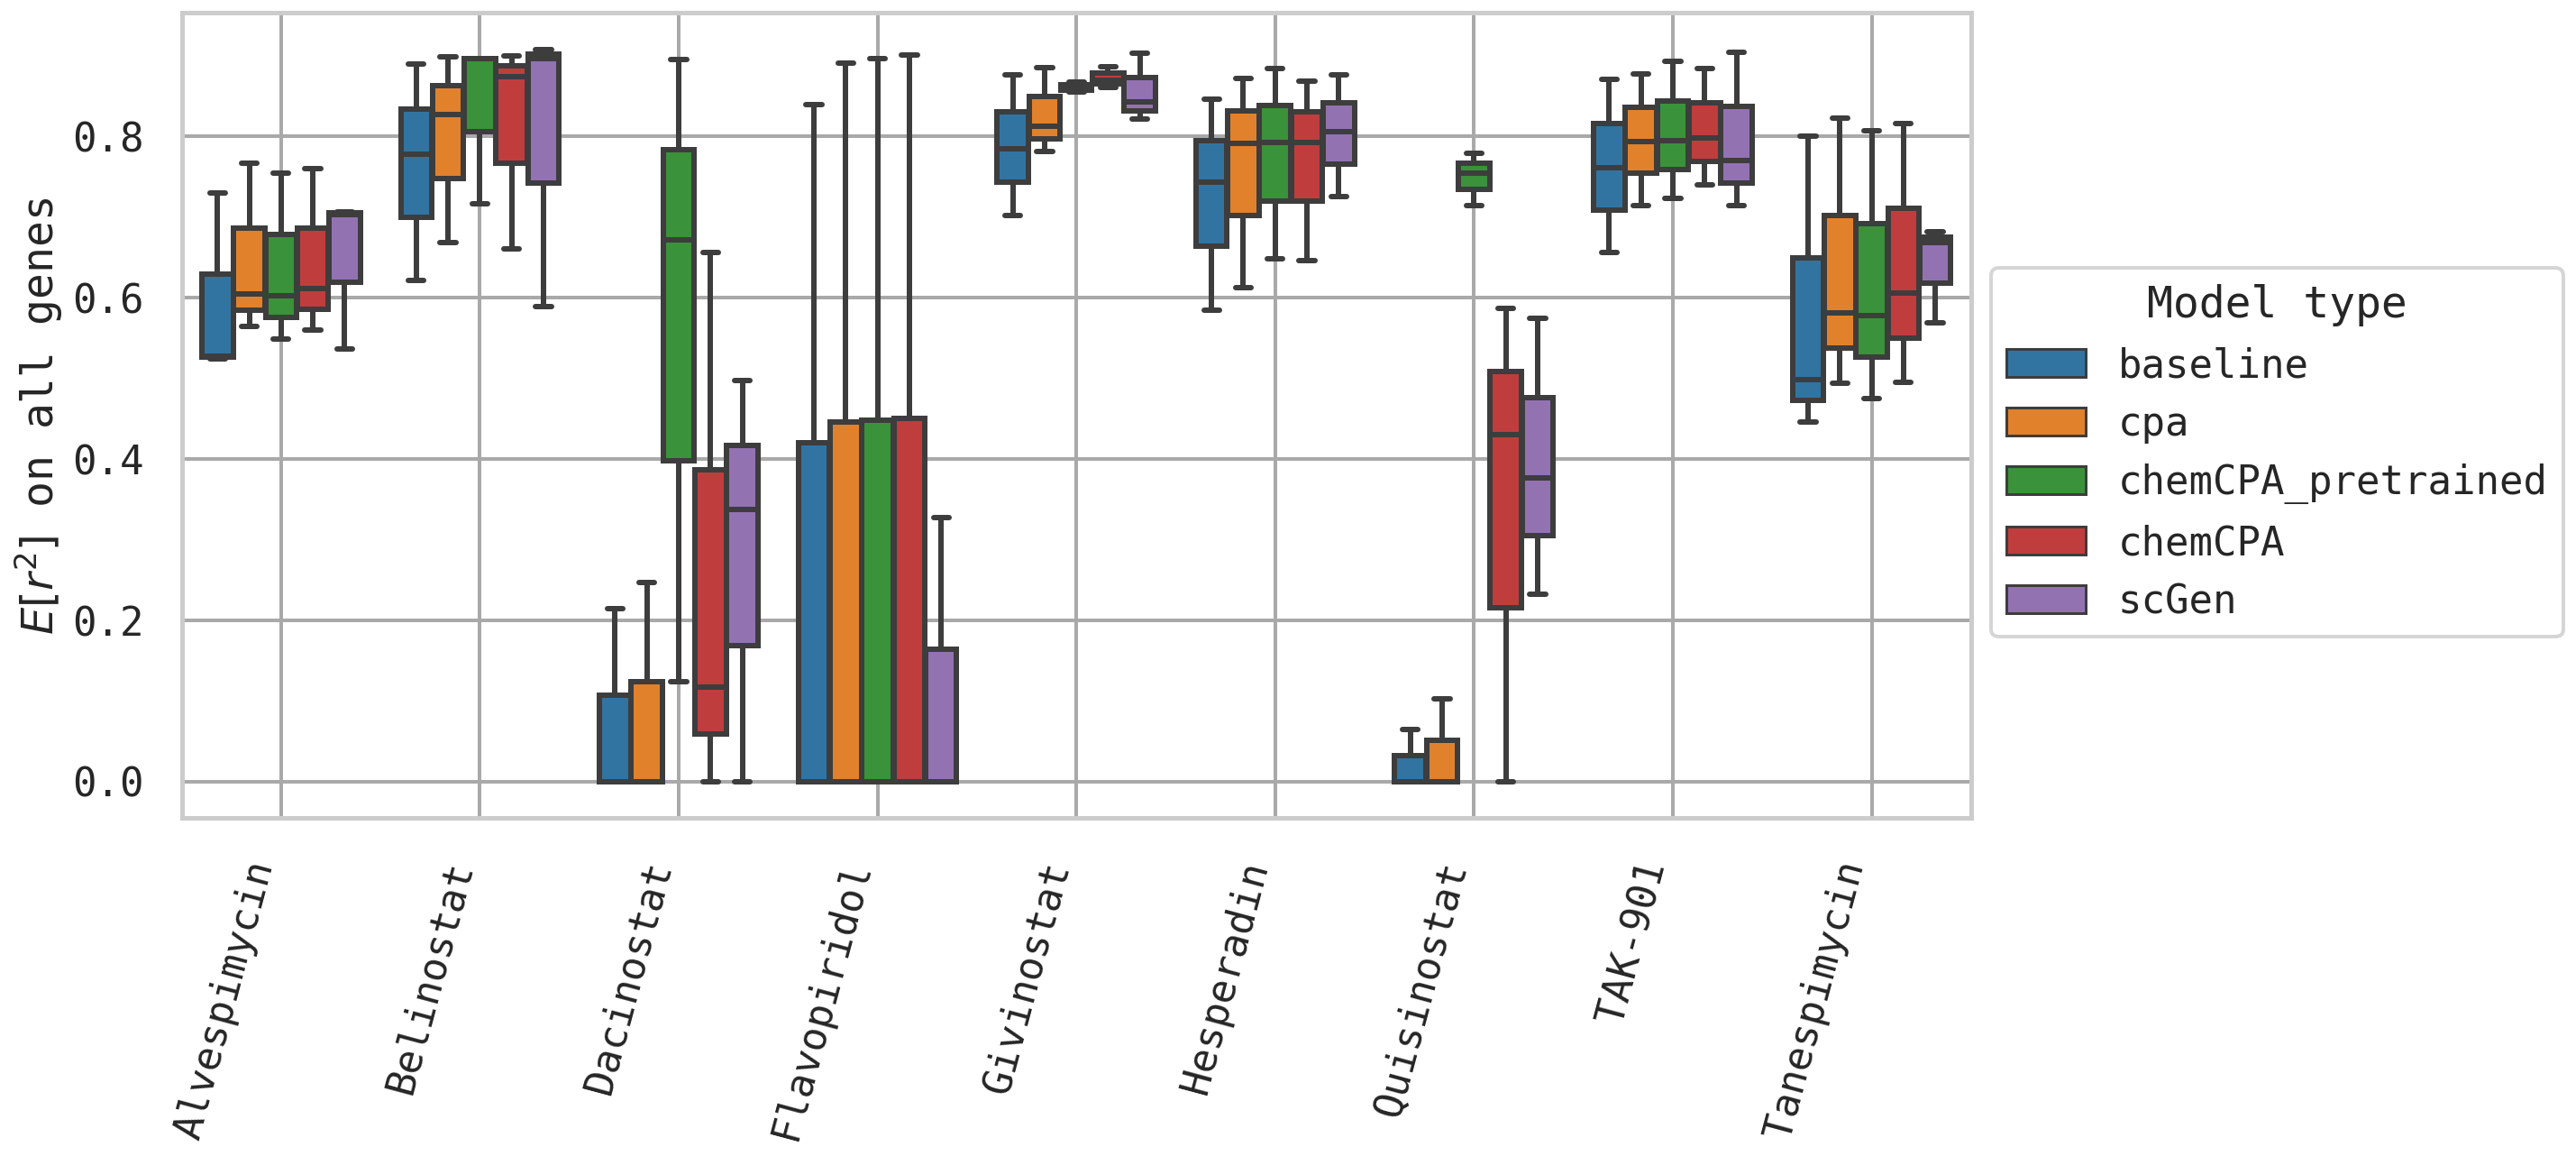

In [7]:
fig, ax = plt.subplots(figsize=(20, 9))

sns.boxplot(
    data=df[df["genes"] == "degs"],
    x="condition",
    y="R2",
    hue="model",
    palette="tab10",
)
ax.set_xticklabels(ax.get_xticklabels(), rotation=75, ha="right")
ax.set_xlabel("")
ax.set_ylabel("$E[r^2]$ on all genes")
ax.legend(
    title="Model type",
    #     fontsize=18,
    #     title_fontsize=24,
    loc="lower left",
    bbox_to_anchor=(1, 0.2),
)
ax.grid(".", color="darkgrey")
plt.tight_layout()

In [8]:
df.groupby(["model", "genes"]).std()

R2
model              genes          
baseline           all    0.280294
                   degs   0.337252
chemCPA            all    0.264198
                   degs   0.311684
chemCPA_pretrained all    0.247264
                   degs   0.259599
cpa                all    0.279410
                   degs   0.348539
scGen              all    0.189817
                   degs   0.284822

In [9]:
df.groupby(["model", "genes"]).mean()

R2
model              genes          
baseline           all    0.692736
                   degs   0.509725
chemCPA            all    0.738044
                   degs   0.604628
chemCPA_pretrained all    0.768633
                   degs   0.682686
cpa                all    0.717369
                   degs   0.541184
scGen              all    0.726763
                   degs   0.591468

In [10]:
DELTA = False

if DELTA:
    df["delta"] = 0

    for cond, _df in df.groupby(["cell_type", "condition", "genes"]):
        df.loc[
            df[["cell_type", "condition", "genes"]].isin(cond).prod(1).astype(bool),
            "delta",
        ] = (
            _df["R2"].values - _df.loc[_df["model"] == "baseline", "R2"].values[0]
        )

In [11]:
df

,index,R2,model,genes,cell_type,condition,dose,model_ct
0,A549_Alvespimycin_0.1,0.729878,baseline,degs,A549,Alvespimycin,0.1,baseline_A549
1,A549_Belinostat_0.1,0.621798,baseline,degs,A549,Belinostat,0.1,baseline_A549
2,A549_Dacinostat_0.1,0.213912,baseline,degs,A549,Dacinostat,0.1,baseline_A549
3,A549_Flavopiridol_0.1,0.839678,baseline,degs,A549,Flavopiridol,0.1,baseline_A549
4,A549_Givinostat_0.1,0.785217,baseline,degs,A549,Givinostat,0.1,baseline_A549
...,...,...,...,...,...,...,...,...
49,MCF7_Quisinostat,0.232411,scGen,degs,MCF7,Quisinostat,0.1,scGen_MCF7
50,MCF7_TAK-901,0.905027,scGen,degs,MCF7,TAK-901,0.1,scGen_MCF7
51,MCF7_Belinostat,0.908346,scGen,degs,MCF7,Belinostat,0.1,scGen_MCF7
52,MCF7_Flavopiridol,0.000000,scGen,degs,MCF7,Flavopiridol,0.1,scGen_MCF7


In [15]:
df1 = df[df.genes == "all"].groupby(["model"]).mean().round(2)
df2 = df[df.genes == "degs"].groupby(["model"]).mean().round(2)
df3 = df[df.genes == "all"].groupby(["model"]).median().round(2)
df4 = df[df.genes == "degs"].groupby(["model"]).median().round(2)

In [16]:
result_df = (
    pd.concat(
        [df1, df2, df3, df4],
        axis=1,
        keys=["Mean all genes", "Mean DEGs", "Median all genes", "Median DEGs"],
    )
    .reindex(["baseline", "scGen", "cpa", "chemCPA", "chemCPA_pretrained"])
    .rename(
        index={
            "baseline": "Baseline",
            "cpa": "CPA",
            "chemCPA_pretrained": "chemCPA pretrained",
        }
    )
)

result_df

,Mean all genes,Mean DEGs,Median all genes,Median DEGs
,R2,R2,R2,R2
model,,,,
Baseline,0.69,0.51,0.83,0.62
scGen,0.73,0.59,0.77,0.68
CPA,0.72,0.54,0.86,0.67
chemCPA,0.74,0.60,0.86,0.66
chemCPA pretrained,0.77,0.68,0.85,0.76


In [17]:
print(result_df.to_markdown())

| model              |   ('Mean all genes', 'R2') |   ('Mean DEGs', 'R2') |   ('Median all genes', 'R2') |   ('Median DEGs', 'R2') |
|:-------------------|---------------------------:|----------------------:|-----------------------------:|------------------------:|
| Baseline           |                       0.69 |                  0.51 |                         0.83 |                    0.62 |
| scGen              |                       0.73 |                  0.59 |                         0.77 |                    0.68 |
| CPA                |                       0.72 |                  0.54 |                         0.86 |                    0.67 |
| chemCPA            |                       0.74 |                  0.6  |                         0.86 |                    0.66 |
| chemCPA pretrained |                       0.77 |                  0.68 |                         0.85 |                    0.76 |


In [18]:
print(result_df.to_latex())

\begin{tabular}{lrrrr}
\toprule
{} & Mean all genes & Mean DEGs & Median all genes & Median DEGs \\
{} &             R2 &        R2 &               R2 &          R2 \\
model              &                &           &                  &             \\
\midrule
Baseline           &           0.69 &      0.51 &             0.83 &        0.62 \\
scGen              &           0.73 &      0.59 &             0.77 &        0.68 \\
CPA                &           0.72 &      0.54 &             0.86 &        0.67 \\
chemCPA            &           0.74 &      0.60 &             0.86 &        0.66 \\
chemCPA pretrained &           0.77 &      0.68 &             0.85 &        0.76 \\
\bottomrule
\end{tabular}

